Networks found:
 Interface name : Wi-Fi 
There are 19 networks currently visible. 

SSID 1 : Ooredoo 4G_8A7073
    Network type            : Infrastructure
    Authentication          : WPA2-Personal
    Encryption              : CCMP 
    BSSID 1                 : d4:72:26:8a:70:73
         Signal             : 99%  
         Radio type         : 802.11n
         Band               : 2.4 GHz
         Channel            : 11 
         Basic rates (Mbps) : 1 2 5.5 11
         Other rates (Mbps) : 6 9 12 18 24 36 48 54

SSID 2 : Galaxy A02s
    Network type            : Infrastructure
    Authentication          : WPA2-Personal
    Encryption              : CCMP 
    BSSID 1                 : 42:93:23:7a:68:f6
         Signal             : 78%  
         Radio type         : 802.11n
         Band               : 2.4 GHz
         Channel            : 2 
         Basic rates (Mbps) : 1 2 5.5 11
         Other rates (Mbps) : 6 9 12 18 24 36 48 54

SSID 3 : Airbox-C5DE
    Network type      

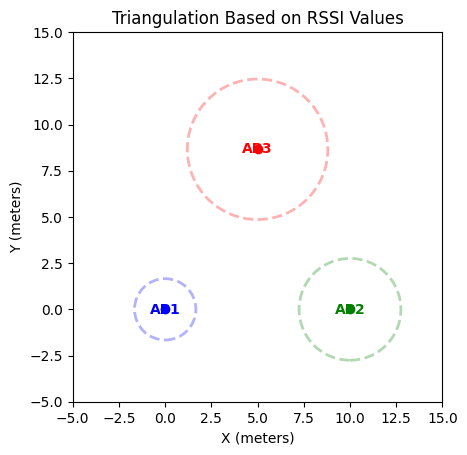

In [14]:
from math import pow
import subprocess
import re
import matplotlib.pyplot as plt

def read_data_from_cmd():
    p = subprocess.Popen("netsh wlan show networks mode=bssid", stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out = p.stdout.read().decode('unicode_escape').strip()
    p.communicate() 
    return out

def get_signal_strength(SSID):
    data = read_data_from_cmd()
    print("Networks found:\n", data)  # Debugging: print all network data
    list1 = re.findall(r'SSID \d+ : (.*?)\n.*?Signal\s+:\s+(\d+)%', data, re.DOTALL)
    
    for i in list1:
        if i[0].strip() == SSID:
            return int(i[1])  # Return signal strength as integer
    return None

def calculate_distance_wifi(signal_strength):
    if signal_strength <= 0:
        rssi = -100
    elif signal_strength >= 100:
        rssi = -50
    else:
        rssi = signal_strength / 2 - 100

    measured_power = -45  # Reference power level at 1 meter
    n = 2.5               # Path-loss exponent

    distance = pow(10, (measured_power - rssi) / (10 * n))
    return distance

# Define SSIDs and positions of the access points
access_points = {
    'AP1': {'ssid': 'Ooredoo 4G_8A7073', 'position': (0, 0)},
    'AP2': {'ssid': 'Rouee', 'position': (10, 0)},
    'AP3': {'ssid': 'Iphone', 'position': (5, 8.66)}  # Roughly an equilateral triangle
}

distances = {}

# Calculate distances for each access point
for ap, info in access_points.items():
    ssid = info['ssid']
    signal_strength = get_signal_strength(ssid)
    if signal_strength is not None:
        distance = calculate_distance_wifi(signal_strength)
        distances[ap] = distance
        print(f"Estimated distance to {ssid}: {distance:.2f} meters")
    else:
        print(f"SSID '{ssid}' not found.")

# Initialize plot
fig, ax = plt.subplots()

# Define unique colors for each AP circle
colors = ['blue', 'green', 'red']

# Draw circles for each AP based on the calculated distances
for i, (ap, info) in enumerate(access_points.items()):
    x, y = info['position']
    distance = distances.get(ap, 0)
    
    # Draw the circle with unique color, larger size, and thicker line
    circle = plt.Circle((x, y), distance, color=colors[i], alpha=0.3, fill=False, linestyle='--', linewidth=2)
    ax.add_artist(circle)
    
    # Mark the position of the access point and label it
    ax.plot(x, y, 'o', color=colors[i])  # Change marker color to match circle
    ax.text(x, y, f'{ap}', ha='center', va='center', color=colors[i], fontweight='bold')

# Set plot limits and labels for visibility
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.title("Triangulation Based on RSSI Values")
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()
